In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from tdoa import tdoa_trilateration, generate_random_tdoa_data

In [3]:
noise_levels = [0, 0.001, 0.01, 0.1]

# M = 3

In [4]:
errors = {}
for noise_level in noise_levels:
    errors[noise_level] = []
    for _ in tqdm(range(10_000)):
        sound_loc, mic_locations, time_diffs = generate_random_tdoa_data(xmin=0, xmax=500, m=3, noise=noise_level, all_pairs=True)
        x, y = tdoa_trilateration(mic_locations=mic_locations, time_diffs=time_diffs)
        errors[noise_level].append(np.linalg.norm(sound_loc - np.array([x, y])))

100%|██████████| 10000/10000 [00:21<00:00, 460.85it/s]


/tmp/ipykernel_16143/2433783824.py:24: RuntimeWarning: divide by zero encountered in log10
  ax.hist(np.log10(errors[noise]), bins=np.linspace(-0, 13, 100), color='tab:blue', alpha=0.5)


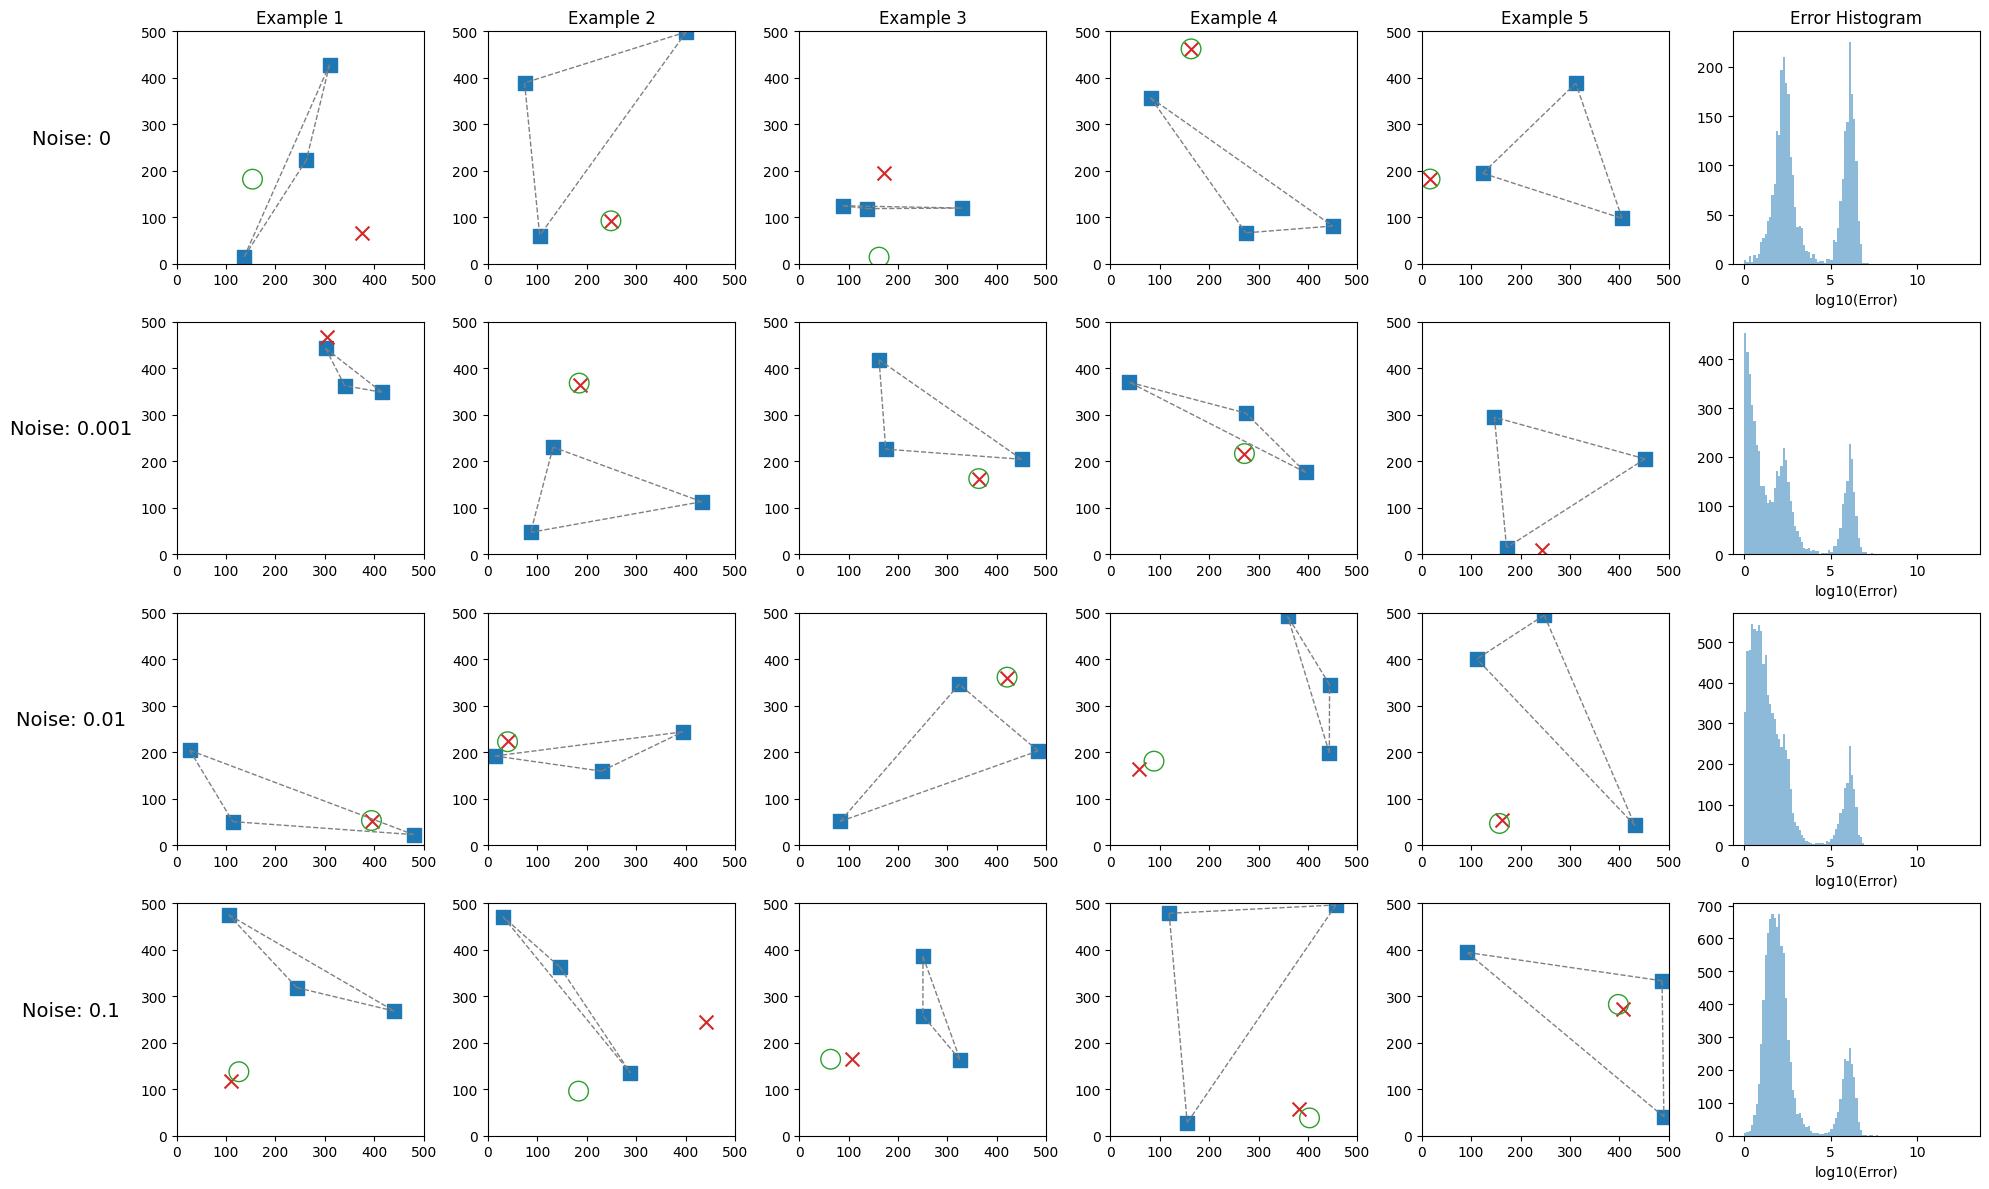

In [5]:
fig, axes = plt.subplots(len(noise_levels), 6, figsize=(20, len(noise_levels) * 3))

for r, (ax_row, noise) in enumerate(zip(axes, noise_levels)):
    for k, ax in enumerate(ax_row[:-1]):
        sound_loc, mic_locations, time_diffs = generate_random_tdoa_data(0, 500, m=3, noise=noise, all_pairs=True)
        est_loc = tdoa_trilateration(mic_locations, time_diffs)
        ax.scatter(*zip(*mic_locations), color='tab:blue', label='Microphones', s=100, marker='s')
        ax.scatter(*sound_loc, color='tab:red', label='True Sound Location', s=100, marker='x')
        ax.scatter(*est_loc, color='tab:green', label='Estimated Sound Location', facecolors='none', s=200, marker='o')
        for mic_pair, time_diff in time_diffs:
            i, j = mic_pair
            x1, y1 = mic_locations[i]
            x2, y2 = mic_locations[j]
            ax.plot([x1, x2], [y1, y2], color='gray', linestyle='dashed', linewidth=1)
        # ax.legend()
        if k == 0:
            ax.set_ylabel(f'Noise: {noise}', fontsize=14, rotation=0, labelpad=50)
        if r == 0:
            ax.set_title(f'Example {k+1}')
        ax.set_xlim(0, 500)
        ax.set_ylim(0, 500)

    ax = ax_row[-1]
    ax.hist(np.log10(errors[noise]), bins=np.linspace(-0, 13, 100), color='tab:blue', alpha=0.5)
    ax.set_xlabel('log10(Error)')
    if r == 0:
        ax.set_title('Error Histogram')

fig.tight_layout()

# M = 4

In [8]:
errors = {}
for noise_level in noise_levels:
    errors[noise_level] = []
    for _ in tqdm(range(10_000)):
        sound_loc, mic_locations, time_diffs = generate_random_tdoa_data(xmin=0, xmax=500, m=4, noise=noise_level, all_pairs=True)
        x, y = tdoa_trilateration(mic_locations=mic_locations, time_diffs=time_diffs)
        errors[noise_level].append(np.linalg.norm(sound_loc - np.array([x, y])))

100%|██████████| 10000/10000 [00:21<00:00, 465.46it/s]


/tmp/ipykernel_16143/4071095264.py:24: RuntimeWarning: divide by zero encountered in log10
  ax.hist(np.log10(errors[noise]), bins=np.linspace(-0, 13, 100), color='tab:blue', alpha=0.5)


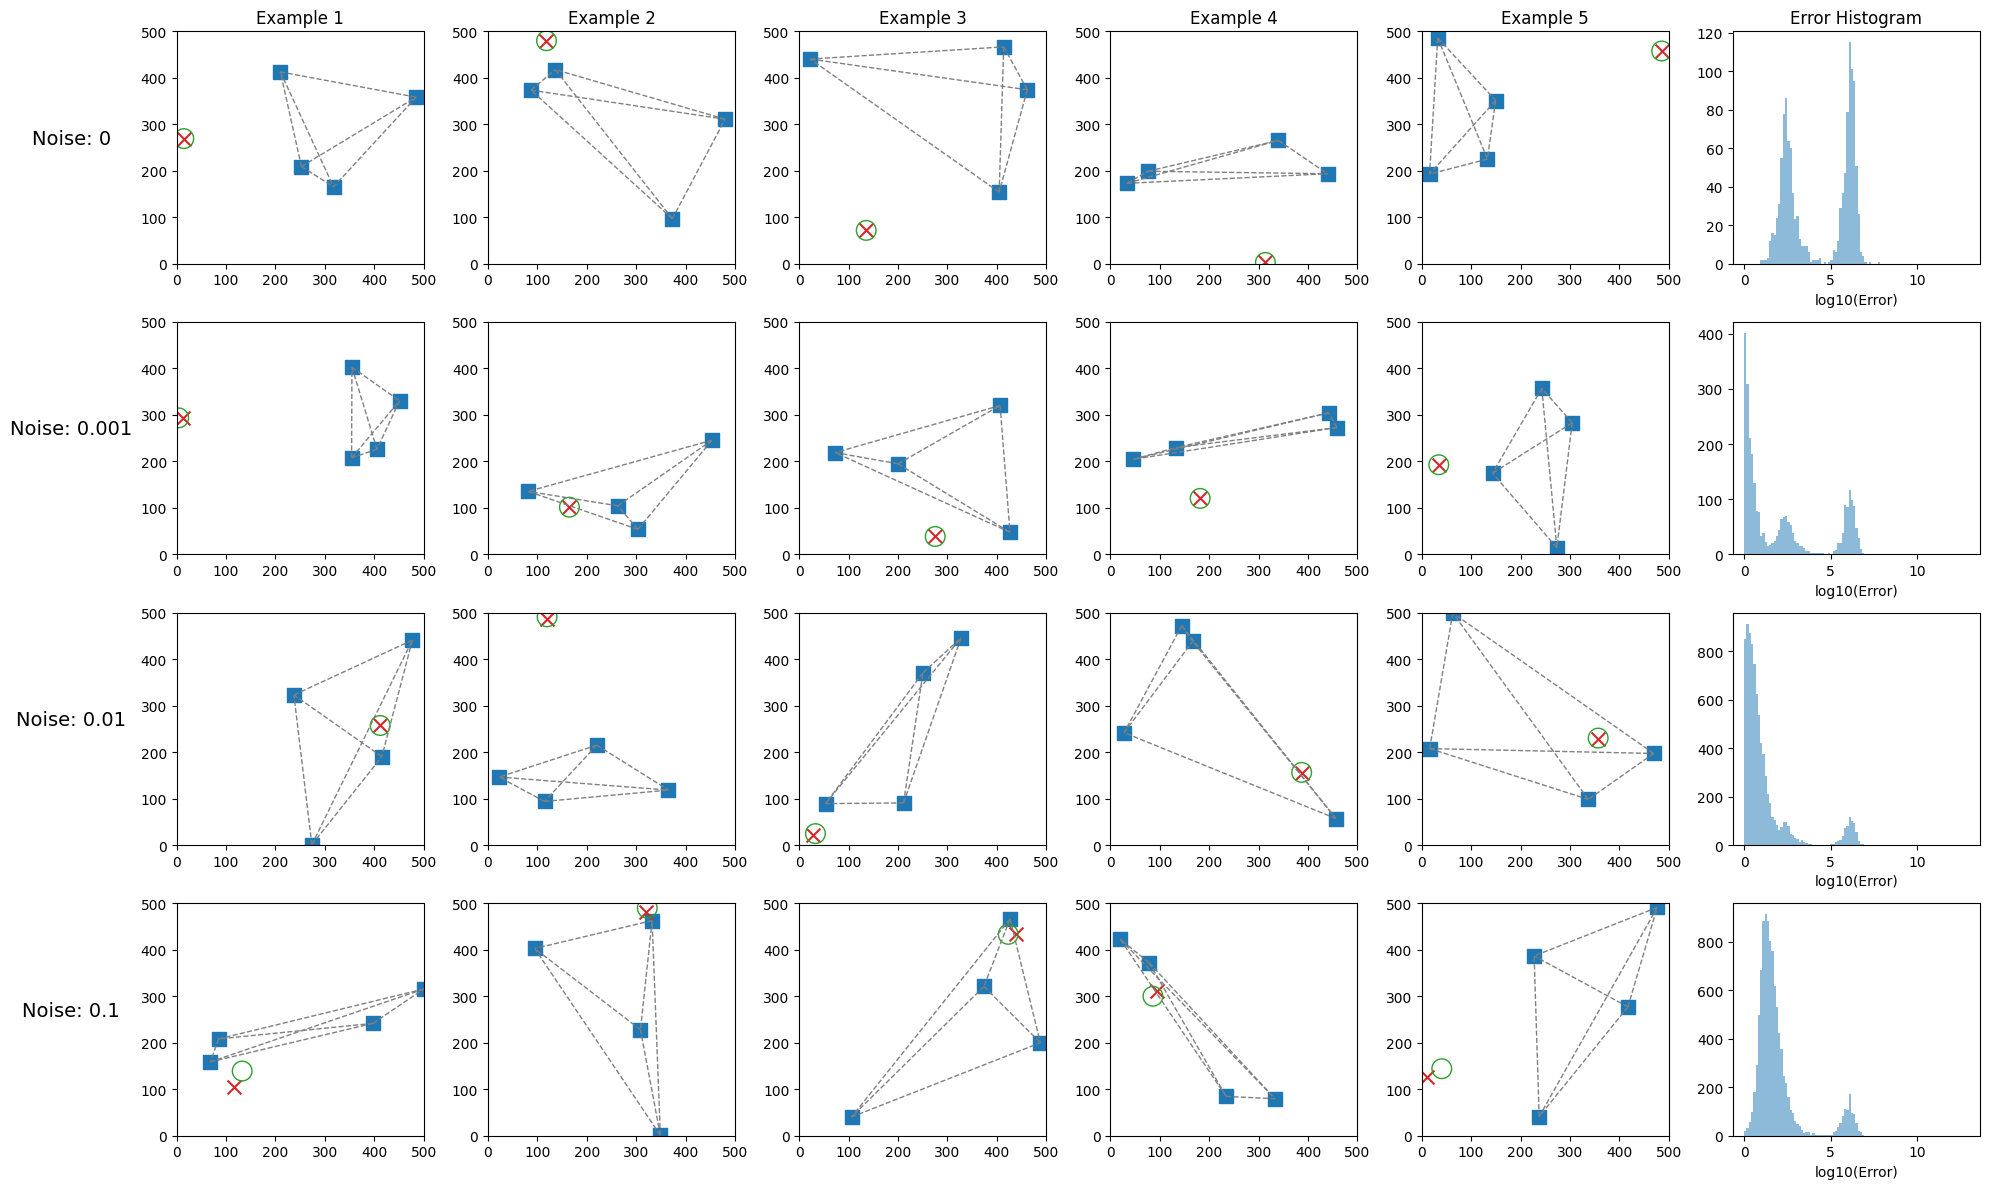

In [9]:
fig, axes = plt.subplots(len(noise_levels), 6, figsize=(20, len(noise_levels) * 3))

for r, (ax_row, noise) in enumerate(zip(axes, noise_levels)):
    for k, ax in enumerate(ax_row[:-1]):
        sound_loc, mic_locations, time_diffs = generate_random_tdoa_data(0, 500, m=4, noise=noise, all_pairs=True)
        est_loc = tdoa_trilateration(mic_locations, time_diffs)
        ax.scatter(*zip(*mic_locations), color='tab:blue', label='Microphones', s=100, marker='s')
        ax.scatter(*sound_loc, color='tab:red', label='True Sound Location', s=100, marker='x')
        ax.scatter(*est_loc, color='tab:green', label='Estimated Sound Location', facecolors='none', s=200, marker='o')
        for mic_pair, time_diff in time_diffs:
            i, j = mic_pair
            x1, y1 = mic_locations[i]
            x2, y2 = mic_locations[j]
            ax.plot([x1, x2], [y1, y2], color='gray', linestyle='dashed', linewidth=1)
        # ax.legend()
        if k == 0:
            ax.set_ylabel(f'Noise: {noise}', fontsize=14, rotation=0, labelpad=50)
        if r == 0:
            ax.set_title(f'Example {k+1}')
        ax.set_xlim(0, 500)
        ax.set_ylim(0, 500)

    ax = ax_row[-1]
    ax.hist(np.log10(errors[noise]), bins=np.linspace(-0, 13, 100), color='tab:blue', alpha=0.5)
    ax.set_xlabel('log10(Error)')
    if r == 0:
        ax.set_title('Error Histogram')

fig.tight_layout()